In [1]:
%pylab inline
from IPython.display import Latex


Populating the interactive namespace from numpy and matplotlib


In [2]:
hr=1000
T=hr*3600
freq=1.0/3
n=int(T*freq)
istate=random.randint(1,3,size=(1,2)) #generate initial state
print istate
flip = random.randint(1,3,size=(n))   #generate the alernatively flipping result
print flip
s=istate #initial state
s0=sum(s)

[[1 2]]
[1 1 1 ..., 1 2 1]


In [3]:
r=[s0]
for i in range(n):
    if i%2==0:
        s[0,1]=flip[i]
        
    else:
        s[0,0]=flip[i]
    r.append(sum(s))

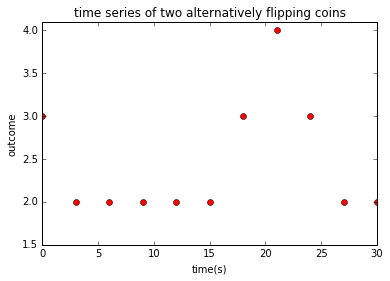

In [4]:
x=linspace(0,T,len(r))
y=array(r)
plt.plot(x,y,'ro')
xlim(0,30)
ylim(1.5,4.1)
xlabel('time(s)')
ylabel('outcome')
title('time series of two alternatively flipping coins')
show()

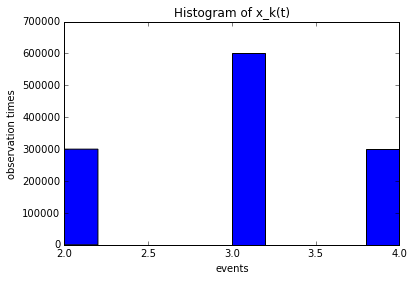

[ 2.   2.2  2.4  2.6  2.8  3.   3.2  3.4  3.6  3.8  4. ]
[299964.0, 0.0, 0.0, 0.0, 0.0, 600403.0, 0.0, 0.0, 0.0, 0, 299634.0]
[299964.0, 600403.0, 299634.0]
[2.0, 3.0, 4.0]


In [5]:
h=hist(r)
title('Histogram of x_k(t)')
xlabel('events')
ylabel('observation times')
show()
M=h[0]
C=h[1]
l=len(C)-2
print C
B=[]
for i in range(len(M)):
    B.append(M[i])
A = B[:l] + [0] + B[l:]
print A
N=[]
L=[]
for i in range(len(C)):
    if A[i]==0:
        pass
    else:
        N.append(A[i])
        L.append(C[i])
print N
print L

In [6]:
SN=sum(N)
c1=round((N[0]/SN),2)
c2=round((N[1]/SN),2)
c3=round((N[2]/SN),2)
def p(x):
    if any(x==2):
        return 1
    elif any(x==3):
        return 1
    elif any(x==4):
        return 1
    else:
        return 0
def P(x):
    if any(x<2):
        return 0
    elif any(2<=x<3):
        return c1
    elif any(3<=x<4):
        return c1+c2
    elif any(4<=x):
        return 1
SN=sum(N)
Latex('$p(x)=%s\delta(x-2)+%s\delta(x-3)+%s\delta(x-4)$'%(c1,c2,c3))

<IPython.core.display.Latex object>

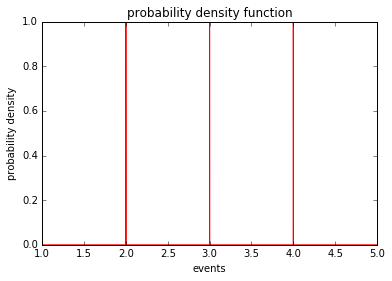

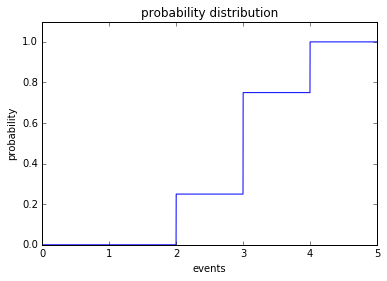

In [7]:
m=5001
Y=[]
Z=[]
x=linspace(0,5,m)             
x=array(x)

for i in range(0,m):
    y=P(x[i])
    Y.append(y)
    z=p(x[i])
    Z.append(z)
    
Y=array(Y)
Z=array(Z)

figure(1)
xlim(1,5)
ylim(0,1)
plt.plot(x,Z,'red')
title('probability density function')
xlabel('events')
ylabel('probability density')
show()

figure(2)

plot(x,Y)
ylim(0,1.1)
title('probability distribution')
xlabel('events')
ylabel('probability')
show()

In [8]:
print round(mean(r),1)
print round(std(r)**2,2)

3.0
0.5


In [9]:
u=dot(N,L)/sum(N)
Latex('the mean $\mu_{x}$ is: %s' %round(u,1))

<IPython.core.display.Latex object>

In [10]:
v=[]
for i in range(len(N)):
    v.append(N[i]*L[i]**2/sum(N))
vs=round(sum(v)-u**2,2)
Latex('the variance ${\sigma_{x}}^{2}$  is: %s' %vs)

<IPython.core.display.Latex object>